Imports
--------

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint

Define Initial Conditions
--------------------

In [10]:
m1 = 1
m2 = 1

L1 = 1
L2 = 1

g = 9.80665

init_param = [3*np.pi/7, 0.0, 3*np.pi/4, 0.0] #(inital theta1, w1, theta2, w2)

t = np.linspace(0,20,2000)

Define Function to Solve our Equations of Motion
----------------------------------

In [11]:
def double_pend(y,t,L1,L2,m1,m2):
    theta1, w1, theta2, w2 = y
    
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1_dot = w1
    w1_dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*w1**2*c + L2*w2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    
    theta2_dot = w2
    w2_dot = ((m1+m2)*(L1*w1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*w2**2*s*c) / L2 / (m1 + m2*s**2)
    
    return theta1_dot, w1_dot, theta2_dot, w2_dot

Find and Unpack Solutions
----------------------

In [12]:
sol = odeint(double_pend, init_param, t, args=(L1, L2, m1, m2))

theta1 = sol[:, 0]
theta2 = sol[:,2]

omega1 = sol[:,1]
omega2 = sol[:,3]


x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

Compute Energy
------------

In [13]:
K = 0.5*(m1+m2)*L1**2*omega1**2 + 0.5*m2*L2**2*omega2**2 + m2*L1*L2*omega1*omega2*np.cos(theta1-theta2)
U = -(m1+m2)*g*L1*np.cos(theta1) - m2*L2*g*np.cos(theta2)

T = K+U

Animate Motion of Double Pendulum
-------------------

<IPython.core.display.Javascript object>


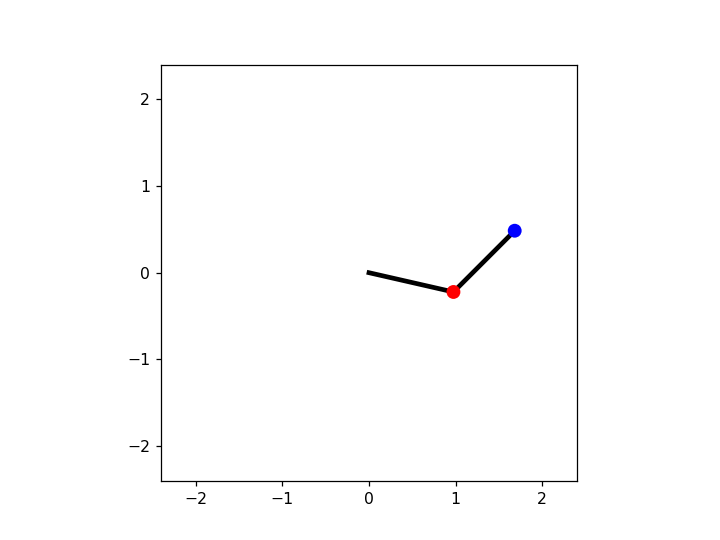

In [25]:
%matplotlib notebook

fig = plt.figure('Double Pendulum')
ax = fig.add_subplot(aspect = 'equal')

x1_0 = L1 * np.sin(theta1[0])
y1_0 = -L1 * np.cos(theta1[0])
x2_0 = x1_0 + L2 * np.sin(theta2[0])
y2_0 = y1_0 - L2 * np.cos(theta2[0])

line1, = ax.plot([0,x1_0],[0,y1_0],lw=3, c='k')
line2, = ax.plot([x1_0,x2_0],[y1_0,y2_0],lw=3, c='k')

bob_radius = 0.08
circle1 = ax.add_patch(plt.Circle((x1_0,y1_0), bob_radius, fc='r', zorder=3))
circle2 = ax.add_patch(plt.Circle((x2_0,y2_0), bob_radius, fc='b', zorder=3))

#trail1, = ax.plot(x1, y1, color='red')
trail2, = ax.plot(x2, y2, color='blue')

ax.set_xlim(-(L1+L2)*1.2, (L1+L2)*1.2)
ax.set_ylim(-(L1+L2)*1.2, (L1+L2)*1.2)

def animate(i):
    #start=max((i-20,0))
    
    line1.set_data([0,x1[i]],[0,y1[i]])
    circle1.set_center((x1[i],y1[i]))
    #trail1.set_data(x1[0:i],y1[0:i])
    
    
    line2.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    circle2.set_center((x2[i],y2[i]))
    trail2.set_data(x2[0:i],y2[0:i])
    return line1, line2, circle1, circle2, trail1, trail2
    
nframes = len(sol)
anim = animation.FuncAnimation(fig, animate, frames=nframes, repeat=0,interval = 10,blit=1)
#plt.show()

Animate Energy over Time
-----------------------

<IPython.core.display.Javascript object>


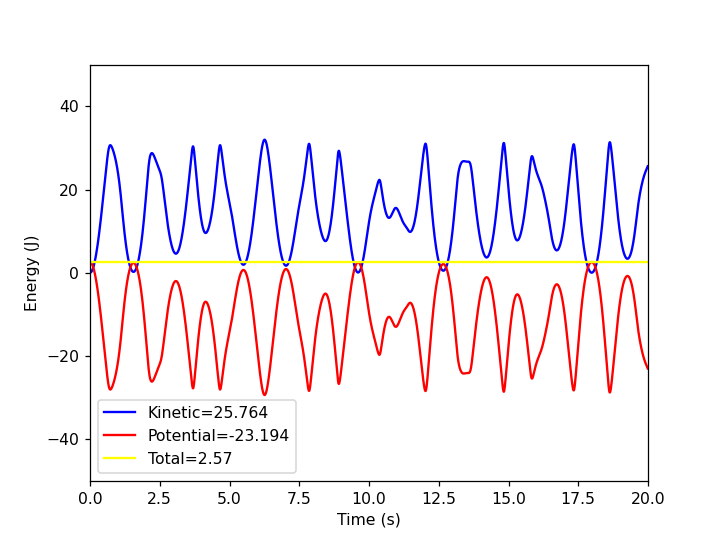

In [26]:
%matplotlib notebook

fig2 = plt.figure('Energy')
ax2 = fig2.add_subplot()

ax2.set_xlim(0, 20)
ax2.set_ylim(-50,50)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Energy (J)')

line_K, = ax2.plot(K, t, color='blue')
line_U, = ax2.plot(U, t, color='red')
line_T, = ax2.plot(T, t, color='yellow')

def animate2(i):
    line_K.set_data(t[0:i],K[0:i])
    line_U.set_data(t[0:i],U[0:i])
    line_T.set_data(t[0:i],T[0:i])
    ax2.legend([line_K,line_U,line_T],[f'Kinetic={round(K[i],3)}',f'Potential={round(U[i],3)}',f'Total={round(T[i],3)}'])

    return line_K, line_U, line_T

anim2 = animation.FuncAnimation(fig2, animate2, frames=nframes, repeat=0,interval = 3,blit=1)